In [375]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [377]:
df= pd.read_excel('lastasknew2.xlsx')
df.shape

(10000, 13)

In [378]:
df.head(2)

,User,Tweet,Dates,Time,hour,yyyy,mm,my,letter count,new_t,weekday,month,tw
0,hdow305305,@tvtcweb_ask ماحصلت دبلوم مسائي للبنات بالتقني...,2022-06-22,22:11:09,22,2022,6,2022-6,78,ماحصلت دبلوم مسائي للبنات بالتقنيه ماراح يفتح...,Wednesday,June,ماحصلت دبلوم مسائي للبنات بالتقنيه ماراح يفتحو...
1,Mana_341,@tvtcweb_ask @reemilittle مايفتح الرابط,2022-06-22,21:38:50,21,2022,6,2022-6,39,مايفتح الرابط,Wednesday,June,@reemilittle مايفتح الرابط


In [379]:
dis4=df.drop(columns=['Tweet','hour','yyyy','mm','my','weekday','month','tw'])
dis4=dis4.rename(columns={"new_t":"Tweets"})
dis4=dis4.rename(columns={"User":"UserName"})

dis4.head(2)


,UserName,Dates,Time,letter count,Tweets
0,hdow305305,2022-06-22,22:11:09,78,ماحصلت دبلوم مسائي للبنات بالتقنيه ماراح يفتح...
1,Mana_341,2022-06-22,21:38:50,39,مايفتح الرابط


In [380]:
dis4.shape

(10000, 5)

In [382]:
dis4['UserName'].nunique()

6632

In [383]:
dis4['letter count'].max()

413

<AxesSubplot:ylabel='Month'>

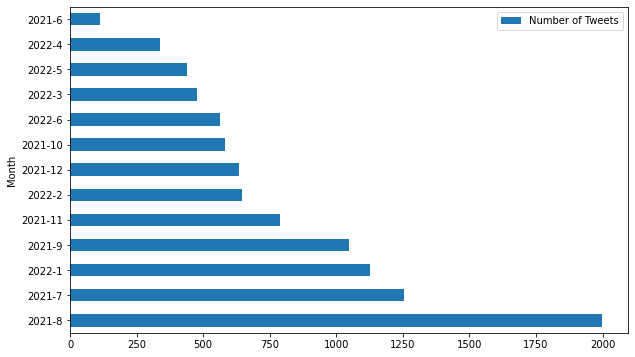

In [386]:
# users active during months
tweets_per_Dates = df['my'].value_counts().rename_axis('Month').reset_index(name='Number of Tweets')
tweets_per_Dates.plot(x="Month", y="Number of Tweets", kind="barh", figsize=(10, 6))


In [397]:
tweets_per_day = df['weekday'].value_counts().rename_axis('weekday').reset_index(name='Number of Tweets')
tweets_per_day.head(7)


,weekday,Number of Tweets
0,Tuesday,1867
1,Monday,1821
2,Wednesday,1808
3,Sunday,1796
4,Thursday,1466
5,Saturday,699
6,Friday,543


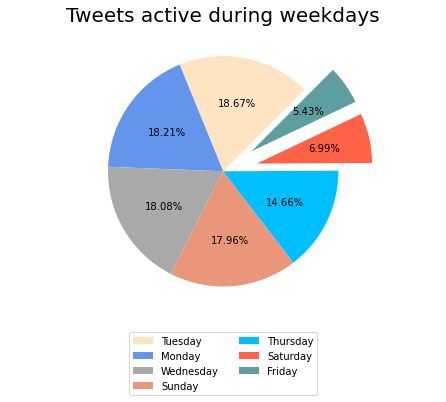

In [388]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
explode = (0, 0, 0, 0,0,0.3,0.3)
mycolors = ["Bisque", "CornflowerBlue", "DarkGray", "DarkSalmon",'DeepSkyBlue','Tomato','CadetBlue']
ax.pie(tweets_per_day['Number of Tweets'],autopct='%1.2f%%',explode=explode,startangle=45,colors = mycolors)
plt.title('Tweets active during weekdays',fontsize=20,loc='center')
plt.legend(labels=tweets_per_day['weekday'], loc='upper center', 
           bbox_to_anchor=(0.5, -0.04), ncol=2)


plt.show()

<AxesSubplot:title={'center':'Tweet Active During Hours '}, xlabel='Hours', ylabel='Tweets'>

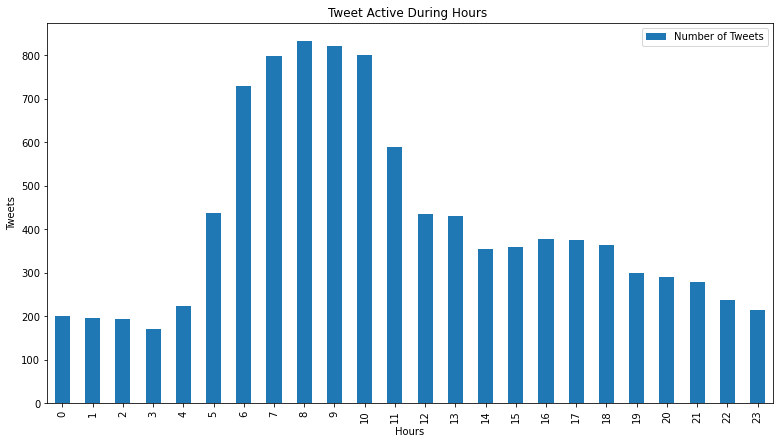

In [389]:
tweets_per_time = df['hour'].value_counts().rename_axis('hour').reset_index(name='Number of Tweets')
tweets_per_time.sort_values("hour", axis = 0, ascending = True,
                 inplace = True, na_position ='first')

tweets_per_time.plot(x="hour", y="Number of Tweets", kind="bar", figsize=(13, 7),title=('Tweet Active During Hours '),xlabel=('Hours'),ylabel=('Tweets'))


In [392]:
mo4.head(2)

,Accounts,Number of mentions
0,@tvtcweb,990
1,دبلوم,534


In [393]:
result = mo4.iloc[[0, 4, 11,15]]
result

,Accounts,Number of mentions
0,@tvtcweb,990
4,@dralfahaid,423
11,@abr20k,317
15,@Dr_Adel_TVTC,242


<AxesSubplot:title={'center':'Most four Accounts'}, ylabel='User Account'>

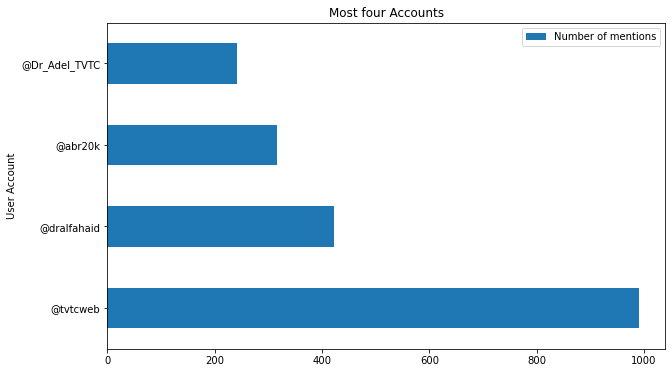

In [346]:
result.plot(x="Accounts", y="Number of mentions", kind="barh", figsize=(10, 6),title=('Most four Accounts'),xlabel=('User Account'),ylabel=('User Account'))



In [394]:
from nltk import ngrams
pd.set_option('display.max_rows', None)
a5.head(3)

,Users,counts
0,"('@dralfahaid', '@Dr_Adel_TVTC')",133
1,"('شكرًا', 'لتواصلكم.')",119
2,"('اللغة', 'الانجليزية')",117


In [395]:
ree = a5.iloc[[2, 5, 6,7,8,9,11,17,22,25,28,34,35,30,49,55,72,79,92,93]]
ree.shape
ree.head(2)

,Users,counts
2,"('اللغة', 'الانجليزية')",117
5,"('يفتح', 'التسجيل')",107


<AxesSubplot:ylabel='Users'>

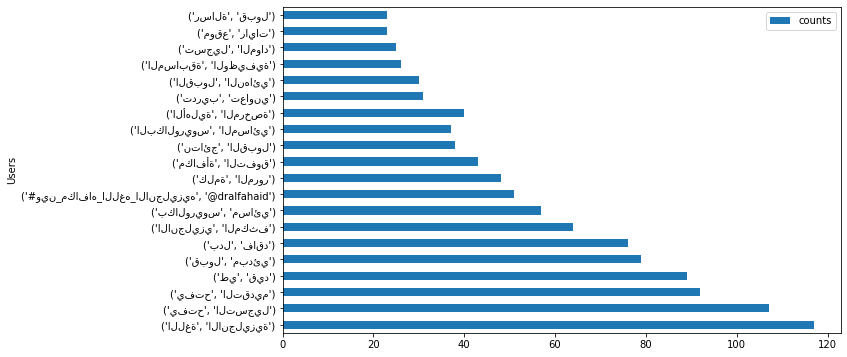

In [396]:
ree.plot(x="Users", y="counts", kind="barh", figsize=(10, 6))
